# Demo Receiver Program

To be used with transducers in a small container of water.

Program starts when button 1 is pushed and ends when button 4 is pushed

### Imports and Microblaze Setup

In [1]:
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")

In [2]:
from pynq.lib.arduino import Arduino_IO
from pynq.lib.arduino import Arduino_Analog
from pynq.lib.arduino import ARDUINO_GROVE_A1
import pynq.lib.rgbled as rgbled
import time
import matplotlib.pyplot as plt
import csv

btns = base.btns_gpio
analog1 = Arduino_Analog(base.ARDUINO, ARDUINO_GROVE_A1)

## Real-time bit detection

In [3]:
xAdcVoltages = []
pmodAdcVoltages = [] 
samples = 0
maxSamples = 20000
voltageThreshold = 0.06
spike_start = 12000
bit = []

start = False

while  not start:
    if btns.read() == 1:
        start = True
        print("Starting")
    time.sleep(0.01)

while start:
    xAdcVoltages.append(analog1.read()[0])
    if xAdcVoltages[-1] >= voltageThreshold:
        plen = samples - spike_start
        spike_start = samples
        #print(plen)
        if (plen > 4000 and plen < 7000):
            print("0")
            print(plen)
            bit.append(0)
        elif (plen > 7000 and plen < 12000):
            bit.append(1)
            print("1")
            print(plen)
        
    samples += 1
    if samples % 10000 == 0:
        if btns.read() >= 8:
            print("Stopping")
            start = False   # stop the program
        
 
print(bit)

Starting
1
10114
0
4821
1
9257
1
9142
0
4890
0
5934
1
9692
1
9162
0
4818
Stopping
[1, 0, 1, 1, 0, 0, 1, 1, 0]


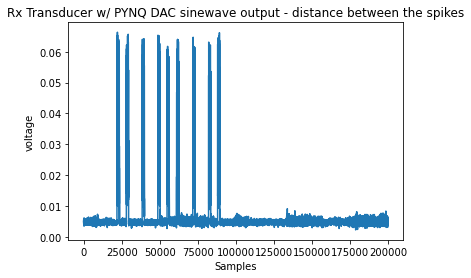

In [4]:
plt.plot(xAdcVoltages)
plt.xlabel('Samples')
plt.ylabel('voltage')
plt.title('Rx Transducer w/ PYNQ DAC sinewave output - distance between the spikes')
plt.show()

In [ ]:
with open("/home/xilinx/pynq/grove-adc.csv", 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(list(xAdcVoltages))